In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Final3_gurgaon_properties_cleaned.csv')

In [4]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat       breez global hill view  sohna road   0.32   
3          flat  bestech park view sanskruti   sector 92   1.60   
4          flat               suncity avenue  sector 102   0.48   

   price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
0          7586.0      3.0       2.0       2       2.0    New Property   
1          8597.0      2.0       2.0       2       4.0    New Property   
2          5470.0      2.0       2.0       1      17.0    New Property   
3          8020.0      3.0       4.0      3+      10.0  Relatively New   
4          9023.0      2.0       2.0       1       5.0  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0         0.0           0.0         0.0         0.0     0.0   
1         1226.0         1.0           1.0         0.0         0.0     0.0   
2         1000.0         0.0           0.0         0.0         0.0     0.0   
3         1615.0         0.0           1.0         0.0         0.0     1.0   
4          582.0         0.0           0.0         1.0         0.0     0.0   

   furnishing_type  luxury_score  
0              0.0           8.0  
1              0.0          38.0  
2              0.0          49.0  
3              1.0         174.0  
4              0.0         159.0

In [5]:
df.shape

(3554, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [7]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [8]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82      3.0       2.0       2       2.0   
1          flat   sector 89   0.95      2.0       2.0       2       4.0   
2          flat  sohna road   0.32      2.0       2.0       1      17.0   
3          flat   sector 92   1.60      3.0       4.0      3+      10.0   
4          flat  sector 102   0.48      2.0       2.0       1       5.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property          850.0         0.0           0.0         0.0   
1    New Property         1226.0         1.0           1.0         0.0   
2    New Property         1000.0         0.0           0.0         0.0   
3  Relatively New         1615.0         0.0           1.0         0.0   
4  Relatively New          582.0         0.0           0.0         1.0   

   pooja room  others  furnishing_type  luxury_score  
0         0.0     0.0              0.0           8.0  
1         0.0     0.0              0.0          38.0  
2         0.0     0.0              0.0          49.0  
3         0.0     1.0              1.0         174.0  
4         0.0     0.0              0.0         159.0

In [9]:
# columns that are not sure 
# numerical = luxury_score, others, floorNum
# categorical = property_type, sector, agePossession

# luxury score

<Axes: ylabel='luxury_score'>

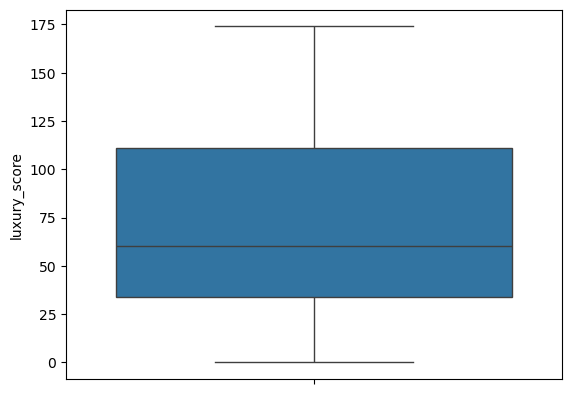

In [10]:
sns.boxplot(df['luxury_score'])

In [11]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return  "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <=175:
        return "High"
    else:
        return None

In [12]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82      3.0       2.0       2       2.0   
1          flat   sector 89   0.95      2.0       2.0       2       4.0   
2          flat  sohna road   0.32      2.0       2.0       1      17.0   
3          flat   sector 92   1.60      3.0       4.0      3+      10.0   
4          flat  sector 102   0.48      2.0       2.0       1       5.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property          850.0         0.0           0.0         0.0   
1    New Property         1226.0         1.0           1.0         0.0   
2    New Property         1000.0         0.0           0.0         0.0   
3  Relatively New         1615.0         0.0           1.0         0.0   
4  Relatively New          582.0         0.0           0.0         1.0   

   pooja room  others  furnishing_type  luxury_score luxury_category  
0         0.0     0.0              0.0           8.0             Low  
1         0.0     0.0              0.0          38.0             Low  
2         0.0     0.0              0.0          49.0             Low  
3         0.0     1.0              1.0         174.0            High  
4         0.0     0.0              0.0         159.0            High

# floorNum

<Axes: ylabel='floorNum'>

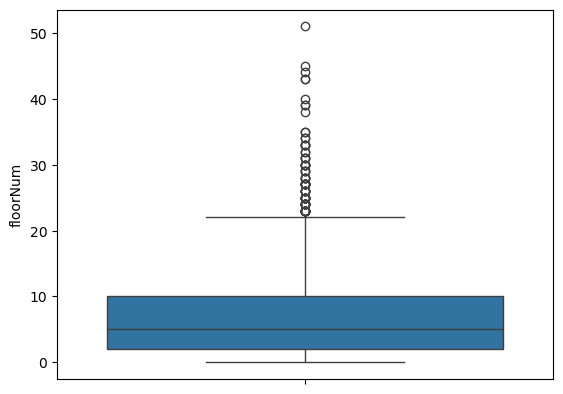

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return  "Low Floor"
    elif 3 <= floor <= 10:
        return "Medium Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 36   0.82      3.0       2.0       2       2.0   
1          flat   sector 89   0.95      2.0       2.0       2       4.0   
2          flat  sohna road   0.32      2.0       2.0       1      17.0   
3          flat   sector 92   1.60      3.0       4.0      3+      10.0   
4          flat  sector 102   0.48      2.0       2.0       1       5.0   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property          850.0         0.0           0.0         0.0   
1    New Property         1226.0         1.0           1.0         0.0   
2    New Property         1000.0         0.0           0.0         0.0   
3  Relatively New         1615.0         0.0           1.0         0.0   
4  Relatively New          582.0         0.0           0.0         1.0   

   pooja room  others  furnishing_type  luxury_score luxury_category  \
0         0.0     0.0              0.0           8.0             Low   
1         0.0     0.0              0.0          38.0             Low   
2         0.0     0.0              0.0          49.0             Low   
3         0.0     1.0              1.0         174.0            High   
4         0.0     0.0              0.0         159.0            High   

  floor_category  
0      Low Floor  
1   Medium Floor  
2     High Floor  
3   Medium Floor  
4   Medium Floor

In [18]:
train_df.drop(columns = ['floorNum', 'luxury_score'], inplace = True)

In [19]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony   agePossession  \
0          flat   sector 36   0.82      3.0       2.0       2    New Property   
1          flat   sector 89   0.95      2.0       2.0       2    New Property   
2          flat  sohna road   0.32      2.0       2.0       1    New Property   
3          flat   sector 92   1.60      3.0       4.0      3+  Relatively New   
4          flat  sector 102   0.48      2.0       2.0       1  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0         0.0           0.0         0.0         0.0     0.0   
1         1226.0         1.0           1.0         0.0         0.0     0.0   
2         1000.0         0.0           0.0         0.0         0.0     0.0   
3         1615.0         0.0           1.0         0.0         0.0     1.0   
4          582.0         0.0           0.0         1.0         0.0     0.0   

   furnishing_type luxury_category floor_category  
0              0.0             Low      Low Floor  
1              0.0             Low   Medium Floor  
2              0.0             Low     High Floor  
3              1.0            High   Medium Floor  
4              0.0            High   Medium Floor

In [20]:
train_df

property_type      sector  price  bedRoom  bathroom balcony  \
0             flat   sector 36   0.82      3.0       2.0       2   
1             flat   sector 89   0.95      2.0       2.0       2   
2             flat  sohna road   0.32      2.0       2.0       1   
3             flat   sector 92   1.60      3.0       4.0      3+   
4             flat  sector 102   0.48      2.0       2.0       1   
...            ...         ...    ...      ...       ...     ...   
3549          flat   sector 84   0.37      2.0       2.0       1   
3550         house  sector 109   6.00      5.0       5.0      3+   
3551          flat    sector 2   0.60      1.0       1.0       1   
3552         house   sector 43  15.50      5.0       6.0       3   
3553          flat   sector 68   1.78      3.0       3.0      3+   

       agePossession  built_up_area  study room  servant room  store room  \
0       New Property          850.0         0.0           0.0         0.0   
1       New Property         1226.0         1.0           1.0         0.0   
2       New Property         1000.0         0.0           0.0         0.0   
3     Relatively New         1615.0         0.0           1.0         0.0   
4     Relatively New          582.0         0.0           0.0         1.0   
...              ...            ...         ...           ...         ...   
3549  Relatively New          532.0         0.0           0.0         0.0   
3550  Relatively New         6228.0         1.0           1.0         1.0   
3551  Moderately Old          665.0         0.0           0.0         0.0   
3552  Moderately Old         5490.0         1.0           1.0         1.0   
3553  Relatively New         1845.0         0.0           0.0         0.0   

      pooja room  others  furnishing_type luxury_category floor_category  
0            0.0     0.0              0.0             Low      Low Floor  
1            0.0     0.0              0.0             Low   Medium Floor  
2            0.0     0.0              0.0             Low     High Floor  
3            0.0     1.0              1.0            High   Medium Floor  
4            0.0     0.0              0.0            High   Medium Floor  
...          ...     ...              ...             ...            ...  
3549         0.0     0.0              0.0          Medium   Medium Floor  
3550         1.0     0.0              0.0            High      Low Floor  
3551         0.0     0.0              1.0          Medium   Medium Floor  
3552         1.0     0.0              0.0          Medium   Medium Floor  
3553         0.0     0.0              1.0          Medium     High Floor  

[3554 rows x 16 columns]

# sklearn ordinalencoder

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include = ['object']).columns


for i in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[i] = oe.fit_transform(data_label_encoded[[i]])
    print(oe.categories_)


#  split dataset 
X_label = data_label_encoded.drop('price', axis = 1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [23]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0   103.0      2.0       2.0      1.0            1.0   
3               0.0    99.0      3.0       4.0      4.0            3.0   
4               0.0     5.0      2.0       2.0      1.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3549            0.0    90.0      2.0       2.0      1.0            3.0   
3550            1.0    12.0      5.0       5.0      4.0            3.0   
3551            0.0    23.0      1.0       1.0      1.0            0.0   
3552            1.0    44.0      5.0       6.0      3.0            0.0   
3553            0.0    71.0      3.0       3.0      4.0            3.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0             850.0         0.0           0.0         0.0         0.0     0.0   
1            1226.0         1.0           1.0         0.0         0.0     0.0   
2            1000.0         0.0           0.0         0.0         0.0     0.0   
3            1615.0         0.0           1.0         0.0         0.0     1.0   
4             582.0         0.0           0.0         1.0         0.0     0.0   
...             ...         ...           ...         ...         ...     ...   
3549          532.0         0.0           0.0         0.0         0.0     0.0   
3550         6228.0         1.0           1.0         1.0         1.0     0.0   
3551          665.0         0.0           0.0         0.0         0.0     0.0   
3552         5490.0         1.0           1.0         1.0         1.0     0.0   
3553         1845.0         0.0           0.0         0.0         0.0     0.0   

      furnishing_type  luxury_category  floor_category  
0                 0.0              1.0             1.0  
1                 0.0              1.0             2.0  
2                 0.0              1.0             0.0  
3                 1.0              0.0             2.0  
4                 0.0              0.0             2.0  
...               ...              ...             ...  
3549              0.0              2.0             2.0  
3550              0.0              0.0             1.0  
3551              1.0              2.0             2.0  
3552              0.0              2.0             2.0  
3553              1.0              2.0             0.0  

[3554 rows x 15 columns]

In [24]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

# Technique - 1 correlation analysis 

<Axes: >

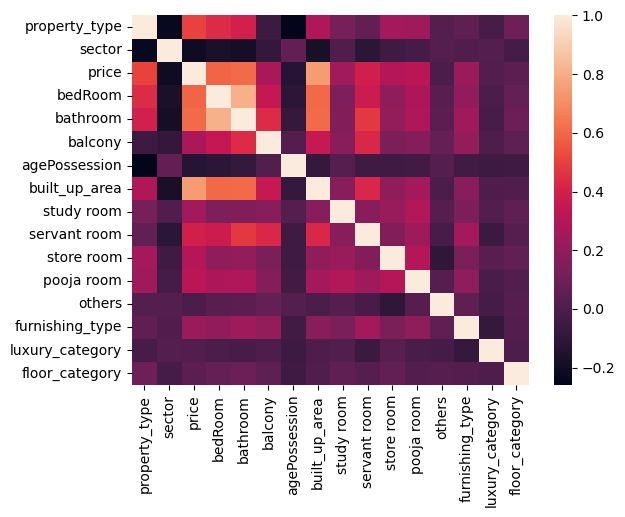

In [25]:
sns.heatmap(data_label_encoded.corr())

In [26]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns = {'index': 'feature', 'price':'corr_coeff'})
fi_df1

feature  corr_coeff
0            sector   -0.212084
1             price    1.000000
2           bedRoom    0.591289
3          bathroom    0.609777
4           balcony    0.269637
5     agePossession   -0.134171
6     built_up_area    0.748574
7        study room    0.242955
8      servant room    0.391930
9        store room    0.305677
10       pooja room    0.319852
11           others   -0.013064
12  furnishing_type    0.225625
13  luxury_category    0.009788
14   floor_category    0.042745

# Technique - 2 Random Forest Feature Importance

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_label.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
    'feature' : X_label.columns,
    'rf_importance' : rf_label.feature_importances_
}).sort_values(by = 'rf_importance', ascending = False)

fi_df2

feature  rf_importance
6     built_up_area       0.650541
1            sector       0.102670
0     property_type       0.100079
3          bathroom       0.025882
2           bedRoom       0.024041
8      servant room       0.019320
5     agePossession       0.014519
4           balcony       0.012576
12  furnishing_type       0.010604
7        study room       0.008383
9        store room       0.008329
13  luxury_category       0.007605
14   floor_category       0.006552
10       pooja room       0.006126
11           others       0.002772

# Technique - 3 Gradient Boosting Feature importance

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

fi_df3 = pd.DataFrame({
    'feature' : X_label.columns,
    'gb_importance' : gb_label.feature_importances_
}).sort_values(by = 'gb_importance', ascending = False)

fi_df3

feature  gb_importance
6     built_up_area       0.677669
1            sector       0.103053
0     property_type       0.098443
2           bedRoom       0.037717
3          bathroom       0.036257
8      servant room       0.023371
9        store room       0.010356
5     agePossession       0.004336
7        study room       0.003033
12  furnishing_type       0.002760
4           balcony       0.001801
14   floor_category       0.000573
13  luxury_category       0.000279
10       pooja room       0.000262
11           others       0.000090

# Technique - 4 Permutation importance

In [31]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size = 0.2, random_state = 42)

rf_label = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_label.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats = 30, random_state = 42)

fi_df4 = pd.DataFrame({
    'feature' : X_label.columns,
    'permutation_importance' : perm_importance.importances_mean
}).sort_values(by = 'permutation_importance', ascending = False)

fi_df4

feature  permutation_importance
6     built_up_area                0.736026
0     property_type                0.200636
1            sector                0.178881
8      servant room                0.021018
3          bathroom                0.019884
2           bedRoom                0.018006
5     agePossession                0.004970
9        store room                0.002150
14   floor_category                0.000907
11           others                0.000792
13  luxury_category                0.000525
4           balcony               -0.000432
10       pooja room               -0.001078
12  furnishing_type               -0.010475
7        study room               -0.018027

# Technique - 5 Lasso

In [32]:
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_scaled, y_label)

fi_df5 = pd.DataFrame({
    'feature' : X_label.columns,
    'lasso_coeff' : lasso.coef_
}).sort_values(by = 'lasso_coeff', ascending = False)

fi_df5

feature  lasso_coeff
6     built_up_area     1.510173
0     property_type     0.713829
3          bathroom     0.275042
9        store room     0.199655
7        study room     0.171846
12  furnishing_type     0.164113
8      servant room     0.160601
10       pooja room     0.073845
13  luxury_category     0.055268
2           bedRoom     0.014170
5     agePossession    -0.000000
14   floor_category    -0.002610
11           others    -0.017163
4           balcony    -0.043562
1            sector    -0.069634

# Technique - 6 RFE (Recursive Feature Elimination)

In [34]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select = X_label.shape[1], step = 1)
selector_label = selector_label.fit(X_label, y_label)

selected_features = X_label.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame({
    'feature' : selected_features,
    'RFE_score' : selected_coefficients
}).sort_values(by = 'RFE_score', ascending = False)

fi_df6

feature  RFE_score
6     built_up_area   0.649802
1            sector   0.103499
0     property_type   0.101433
2           bedRoom   0.026284
3          bathroom   0.025329
8      servant room   0.019623
4           balcony   0.013214
5     agePossession   0.012869
12  furnishing_type   0.010024
7        study room   0.009070
9        store room   0.008208
13  luxury_category   0.006587
14   floor_category   0.006396
10       pooja room   0.004859
11           others   0.002803

# Technique - 7 Linear Regression Weights

In [35]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_scaled, y_label)

fi_df7 = pd.DataFrame({
    'feature' : X_label.columns,
    'reg_coeffs' : LR.coef_
}).sort_values(by = 'reg_coeffs', ascending = False)

fi_df7

feature  reg_coeffs
6     built_up_area    1.512629
0     property_type    0.712890
3          bathroom    0.281976
9        store room    0.204159
7        study room    0.180048
12  furnishing_type    0.173192
8      servant room    0.169605
10       pooja room    0.076893
13  luxury_category    0.066472
2           bedRoom    0.016790
5     agePossession   -0.002041
14   floor_category   -0.013482
11           others   -0.025155
4           balcony   -0.066353
1            sector   -0.078657

## Merge all feature importance columns 

In [37]:
final_fi_df = fi_df1.merge(fi_df2, on = 'feature').merge(fi_df3, on = 'feature').merge(fi_df4, on = 'feature').merge(fi_df5, on = 'feature').merge(fi_df6, on = 'feature').merge(fi_df7, on = 'feature').set_index('feature')

In [38]:
final_fi_df

corr_coeff  rf_importance  gb_importance  \
feature                                                     
sector            -0.212084       0.102670       0.103053   
bedRoom            0.591289       0.024041       0.037717   
bathroom           0.609777       0.025882       0.036257   
balcony            0.269637       0.012576       0.001801   
agePossession     -0.134171       0.014519       0.004336   
built_up_area      0.748574       0.650541       0.677669   
study room         0.242955       0.008383       0.003033   
servant room       0.391930       0.019320       0.023371   
store room         0.305677       0.008329       0.010356   
pooja room         0.319852       0.006126       0.000262   
others            -0.013064       0.002772       0.000090   
furnishing_type    0.225625       0.010604       0.002760   
luxury_category    0.009788       0.007605       0.000279   
floor_category     0.042745       0.006552       0.000573   

                 permutation_importance  lasso_coeff  RFE_score  reg_coeffs  
feature                                                                      
sector                         0.178881    -0.069634   0.103499   -0.078657  
bedRoom                        0.018006     0.014170   0.026284    0.016790  
bathroom                       0.019884     0.275042   0.025329    0.281976  
balcony                       -0.000432    -0.043562   0.013214   -0.066353  
agePossession                  0.004970    -0.000000   0.012869   -0.002041  
built_up_area                  0.736026     1.510173   0.649802    1.512629  
study room                    -0.018027     0.171846   0.009070    0.180048  
servant room                   0.021018     0.160601   0.019623    0.169605  
store room                     0.002150     0.199655   0.008208    0.204159  
pooja room                    -0.001078     0.073845   0.004859    0.076893  
others                         0.000792    -0.017163   0.002803   -0.025155  
furnishing_type               -0.010475     0.164113   0.010024    0.173192  
luxury_category                0.000525     0.055268   0.006587    0.066472  
floor_category                 0.000907    -0.002610   0.006396   -0.013482

In [39]:
# normalize the score 
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis = 0), axis = 1)

In [40]:
final_fi_df

corr_coeff  rf_importance  gb_importance  \
feature                                                     
sector            -0.062405       0.114088       0.114305   
bedRoom            0.173984       0.026715       0.041835   
bathroom           0.179424       0.028760       0.040215   
balcony            0.079339       0.013975       0.001997   
agePossession     -0.039479       0.016133       0.004809   
built_up_area      0.220264       0.722887       0.751665   
study room         0.071488       0.009315       0.003364   
servant room       0.115324       0.021468       0.025923   
store room         0.089944       0.009255       0.011487   
pooja room         0.094115       0.006808       0.000291   
others            -0.003844       0.003080       0.000100   
furnishing_type    0.066389       0.011784       0.003062   
luxury_category    0.002880       0.008451       0.000309   
floor_category     0.012578       0.007281       0.000635   

                 permutation_importance  lasso_coeff  RFE_score  reg_coeffs  
feature                                                                      
sector                         0.187674    -0.027946   0.115182   -0.031512  
bedRoom                        0.018891     0.005687   0.029251    0.006727  
bathroom                       0.020861     0.110381   0.028188    0.112968  
balcony                       -0.000453    -0.017483   0.014705   -0.026583  
agePossession                  0.005215    -0.000000   0.014322   -0.000818  
built_up_area                  0.772206     0.606071   0.723154    0.606003  
study room                    -0.018914     0.068966   0.010094    0.072132  
servant room                   0.022052     0.064453   0.021838    0.067949  
store room                     0.002255     0.080126   0.009135    0.081792  
pooja room                    -0.001131     0.029636   0.005408    0.030806  
others                         0.000831    -0.006888   0.003119   -0.010078  
furnishing_type               -0.010989     0.065863   0.011156    0.069386  
luxury_category                0.000551     0.022181   0.007330    0.026631  
floor_category                 0.000952    -0.001048   0.007117   -0.005401

In [41]:
# to drop pooja room, study room, others 
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0   103.0      2.0       2.0      1.0            1.0   
3               0.0    99.0      3.0       4.0      4.0            3.0   
4               0.0     5.0      2.0       2.0      1.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3549            0.0    90.0      2.0       2.0      1.0            3.0   
3550            1.0    12.0      5.0       5.0      4.0            3.0   
3551            0.0    23.0      1.0       1.0      1.0            0.0   
3552            1.0    44.0      5.0       6.0      3.0            0.0   
3553            0.0    71.0      3.0       3.0      4.0            3.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0             850.0         0.0           0.0         0.0         0.0     0.0   
1            1226.0         1.0           1.0         0.0         0.0     0.0   
2            1000.0         0.0           0.0         0.0         0.0     0.0   
3            1615.0         0.0           1.0         0.0         0.0     1.0   
4             582.0         0.0           0.0         1.0         0.0     0.0   
...             ...         ...           ...         ...         ...     ...   
3549          532.0         0.0           0.0         0.0         0.0     0.0   
3550         6228.0         1.0           1.0         1.0         1.0     0.0   
3551          665.0         0.0           0.0         0.0         0.0     0.0   
3552         5490.0         1.0           1.0         1.0         1.0     0.0   
3553         1845.0         0.0           0.0         0.0         0.0     0.0   

      furnishing_type  luxury_category  floor_category  
0                 0.0              1.0             1.0  
1                 0.0              1.0             2.0  
2                 0.0              1.0             0.0  
3                 1.0              0.0             2.0  
4                 0.0              0.0             2.0  
...               ...              ...             ...  
3549              0.0              2.0             2.0  
3550              0.0              0.0             1.0  
3551              1.0              2.0             2.0  
3552              0.0              2.0             2.0  
3553              1.0              2.0             0.0  

[3554 rows x 15 columns]

In [47]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

scores = cross_val_score(rf, X_label, y_label, cv = 5, scoring = 'r2')

In [48]:
print(scores.mean())

0.8193190510339333


In [49]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

scores = cross_val_score(rf, X_label.drop(columns = ['pooja room', 'study room', 'others']), y_label, cv = 5, scoring = 'r2')

In [50]:
print(scores.mean())

0.8196500940616491


In [51]:
export_df = X_label.drop(columns = ['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [52]:
export_df.to_csv('Final4_gurgaon_properties_cleaned.csv', index = False)